In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2

In [2]:
from pathlib import Path # for data path 
from warnings import filterwarnings
filterwarnings("ignore") # ignore un necessary warnings
import os
from imutils import paths # for image paths
import glob

In [3]:
data_path = Path("D://ML DL AI DSBDA//Mushroom Classification using Deep Learning//archive//Mushrooms//")

In [4]:
data_path

WindowsPath('D:/ML DL AI DSBDA/Mushroom Classification using Deep Learning/archive/Mushrooms')

In [5]:
mush_images = list(data_path.glob(r"*/*.jpg"))

In [6]:
mush_class_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], mush_images))

In [7]:
images = pd.Series(mush_images, name="JPG").astype(str)
labels = pd.Series(mush_class_labels, name="CATEGORY")

In [8]:
type(images), type(labels)

(pandas.core.series.Series, pandas.core.series.Series)

In [9]:
data = pd.concat([images, labels],axis=1)

In [10]:
data.head()

,JPG,CATEGORY
0,D:\ML DL AI DSBDA\Mushroom Classification usin...,Agaricus
1,D:\ML DL AI DSBDA\Mushroom Classification usin...,Agaricus
2,D:\ML DL AI DSBDA\Mushroom Classification usin...,Agaricus
3,D:\ML DL AI DSBDA\Mushroom Classification usin...,Agaricus
4,D:\ML DL AI DSBDA\Mushroom Classification usin...,Agaricus


In [11]:
main_data = data.sample(frac = 1).reset_index(drop=True)

In [12]:
main_data.head(-1)

,JPG,CATEGORY
0,D:\ML DL AI DSBDA\Mushroom Classification usin...,Amanita
1,D:\ML DL AI DSBDA\Mushroom Classification usin...,Lactarius
2,D:\ML DL AI DSBDA\Mushroom Classification usin...,Amanita
3,D:\ML DL AI DSBDA\Mushroom Classification usin...,Boletus
4,D:\ML DL AI DSBDA\Mushroom Classification usin...,Cortinarius
...,...,...
6708,D:\ML DL AI DSBDA\Mushroom Classification usin...,Amanita
6709,D:\ML DL AI DSBDA\Mushroom Classification usin...,Lactarius
6710,D:\ML DL AI DSBDA\Mushroom Classification usin...,Lactarius
6711,D:\ML DL AI DSBDA\Mushroom Classification usin...,Agaricus


In [13]:
sample_data = main_data['JPG'][0:8]
sample_data

0    D:\ML DL AI DSBDA\Mushroom Classification usin...
1    D:\ML DL AI DSBDA\Mushroom Classification usin...
2    D:\ML DL AI DSBDA\Mushroom Classification usin...
3    D:\ML DL AI DSBDA\Mushroom Classification usin...
4    D:\ML DL AI DSBDA\Mushroom Classification usin...
5    D:\ML DL AI DSBDA\Mushroom Classification usin...
6    D:\ML DL AI DSBDA\Mushroom Classification usin...
7    D:\ML DL AI DSBDA\Mushroom Classification usin...
Name: JPG, dtype: object

In [14]:
sample_labels = main_data['CATEGORY'][0:8]
sample_labels

0        Amanita
1      Lactarius
2        Amanita
3        Boletus
4    Cortinarius
5        Boletus
6    Cortinarius
7        Amanita
Name: CATEGORY, dtype: object

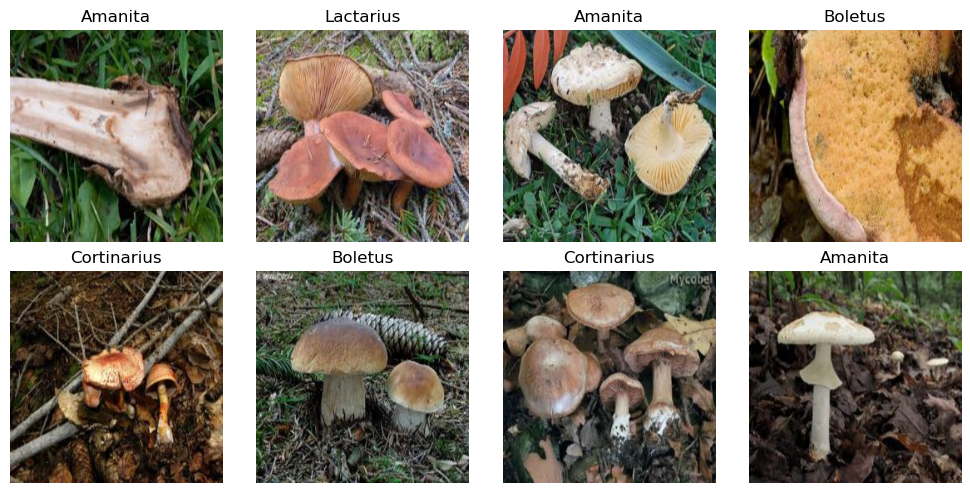

In [15]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.title("Mushroom Images")

# Iterate over the image paths and corresponding subplot axes

for i, (defective_image_arr, ax) in enumerate(zip(sample_data, axes.flatten())):
    # Load the image using any library of your choice (e.g., PIL, OpenCV)
    image = plt.imread(defective_image_arr)

    # Display the image
    ax.imshow(image)
    ax.set_title(sample_labels[i])  # Set a title for each subplot
    ax.axis('off')  # Turn off axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [16]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing your image folders
data_dir = 'D://ML DL AI DSBDA//Mushroom Classification using Deep Learning//archive//Mushrooms//'

# Define the parameters for data generation
batch_size = 32
image_size = (256, 256)
validation_split = 0.2

# Create the ImageDataGenerator for data augmentation and preprocessing
data_generator = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values between 0 and 1
    rotation_range=20,         # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,     # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,    # Randomly shift images vertically by up to 10%
    horizontal_flip=True,      # Randomly flip images horizontally
    vertical_flip=False,       # Do not flip images vertically
    validation_split=validation_split  # Split data into train and validation sets
)

# Generate the training dataset
train_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',          # Generate training set
    shuffle=True                # Shuffle the data
)

# Generate the validation dataset
validation_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',        # Generate validation set
    shuffle=True                # Shuffle the data
)

# Generate the testing dataset without data augmentation
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset=None,                # Generate full dataset for testing
    shuffle=False               # Do not shuffle the data
)


Found 5375 images belonging to 9 classes.
Found 1339 images belonging to 9 classes.
Found 6714 images belonging to 9 classes.


In [17]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the CNN model
model_2 = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape = (256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # Output layer with 9 classes
])

In [18]:
# Compile the model
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Train the model
history = model_2.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)


Epoch 1/20
168/168 [==============================] - 351s 2s/step - loss: 1.9524 - accuracy: 0.2605 - val_loss: 1.9875 - val_accuracy: 0.3084
Epoch 2/20
168/168 [==============================] - 297s 2s/step - loss: 1.8280 - accuracy: 0.3213 - val_loss: 1.9472 - val_accuracy: 0.3189
Epoch 3/20
168/168 [==============================] - 249s 1s/step - loss: 1.7619 - accuracy: 0.3628 - val_loss: 1.8589 - val_accuracy: 0.3503
Epoch 4/20
168/168 [==============================] - 280s 2s/step - loss: 1.6964 - accuracy: 0.3847 - val_loss: 1.9065 - val_accuracy: 0.3264
Epoch 5/20
168/168 [==============================] - 273s 2s/step - loss: 1.6550 - accuracy: 0.4082 - val_loss: 1.7621 - val_accuracy: 0.3779
Epoch 6/20
168/168 [==============================] - 251s 1s/step - loss: 1.6144 - accuracy: 0.4208 - val_loss: 1.7415 - val_accuracy: 0.3749
Epoch 7/20
168/168 [==============================] - 249s 1s/step - loss: 1.5498 - accuracy: 0.4487 - val_loss: 1.7257 - val_accuracy: 0.3876

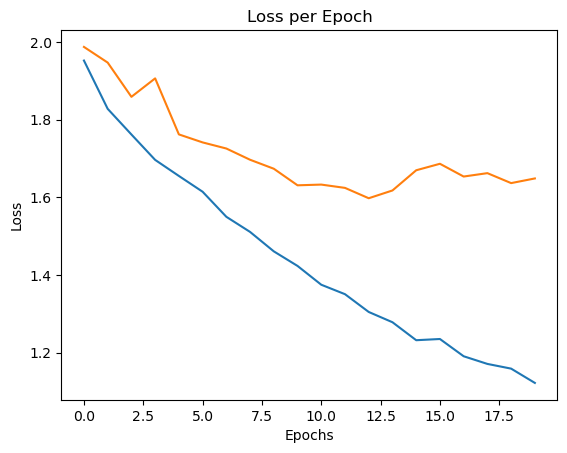

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

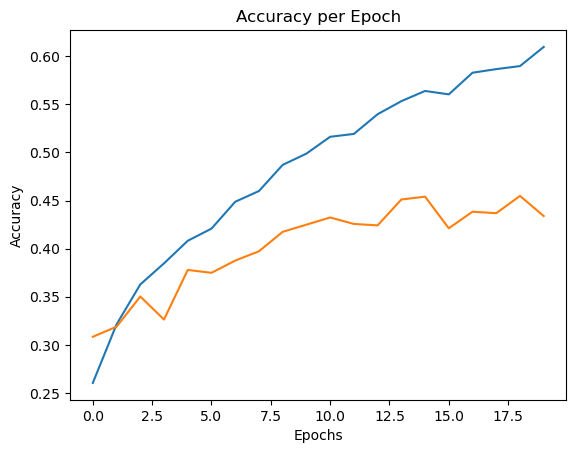

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [23]:
model_2.save("Trained Models/cnn.h5")

In [24]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load the pre-trained InceptionV3 model
model_3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [25]:
# Add additional layers
x = model_3.output
num_classes = 9
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Additional dense layer
predictions = Dense(num_classes, activation='softmax')(x)  

# Create the new model
new_model = tf.keras.Model(inputs = model_3.input, outputs = predictions)

# Optional: Freeze base layers
for layer in model_3.layers:
    layer.trainable = False

# Optional: Print the model summary
# new_model.summary()

In [26]:
# Compile the model
new_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
inception = new_model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
168/168 [==============================] - 496s 3s/step - loss: 1.4687 - accuracy: 0.5113 - val_loss: 1.2272 - val_accuracy: 0.5527
Epoch 2/10
168/168 [==============================] - 532s 3s/step - loss: 1.0678 - accuracy: 0.6240 - val_loss: 1.1629 - val_accuracy: 0.5975
Epoch 3/10
168/168 [==============================] - 543s 3s/step - loss: 0.9662 - accuracy: 0.6601 - val_loss: 1.2265 - val_accuracy: 0.5780
Epoch 4/10
168/168 [==============================] - 581s 3s/step - loss: 0.9198 - accuracy: 0.6755 - val_loss: 1.1871 - val_accuracy: 0.5915
Epoch 5/10
168/168 [==============================] - 578s 3s/step - loss: 0.8471 - accuracy: 0.6977 - val_loss: 1.1885 - val_accuracy: 0.5945
Epoch 6/10
168/168 [==============================] - 584s 3s/step - loss: 0.7966 - accuracy: 0.7198 - val_loss: 1.1457 - val_accuracy: 0.6161
Epoch 7/10
168/168 [==============================] - 531s 3s/step - loss: 0.7711 - accuracy: 0.7252 - val_loss: 1.0837 - val_accuracy: 0.6229

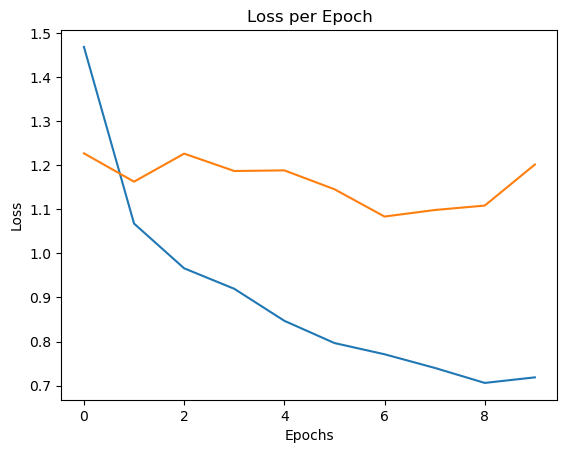

In [28]:
plt.plot(inception.history['loss'])
plt.plot(inception.history['val_loss'])
plt.title("Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

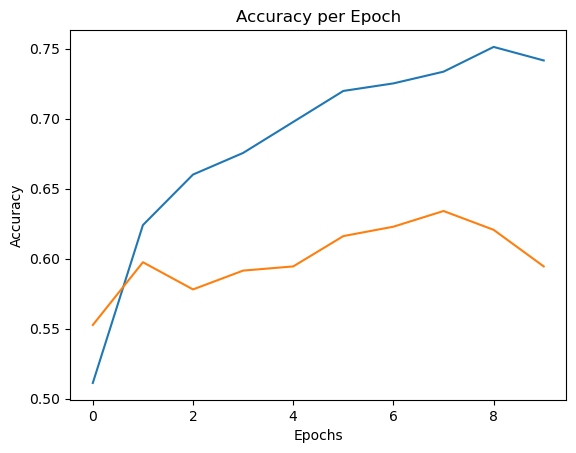

In [29]:
plt.plot(inception.history['accuracy'])
plt.plot(inception.history['val_accuracy'])
plt.title("Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [30]:
new_model.save("Trained Models/inception_model.h5")

### make predicitons for the CNN model

In [31]:
predictions = model_2.predict(test_generator)

210/210 [==============================] - 58s 276ms/step


### make predictions for the inceptionv3 model

In [32]:
predictions_1 = new_model.predict(test_generator)

210/210 [==============================] - 460s 2s/step


<AxesSubplot:>

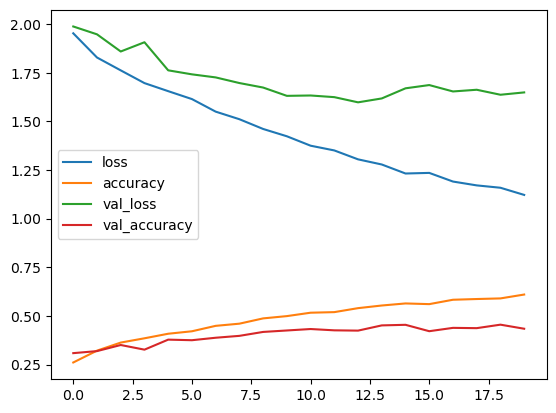

In [39]:
cnn_data = pd.DataFrame(history.history)
cnn_data.plot()

<AxesSubplot:>

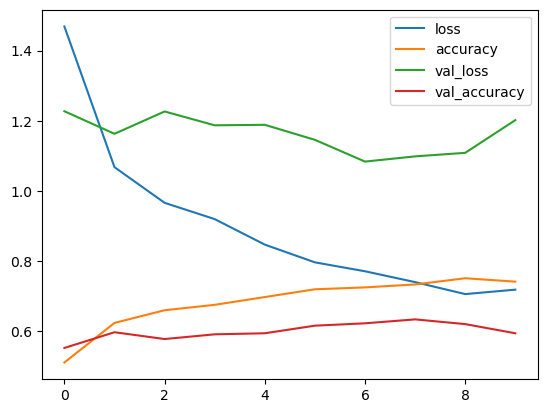

In [40]:
incept_data = pd.DataFrame(inception.history)
incept_data.plot()

1/1 [==============================] - 0s 159ms/step


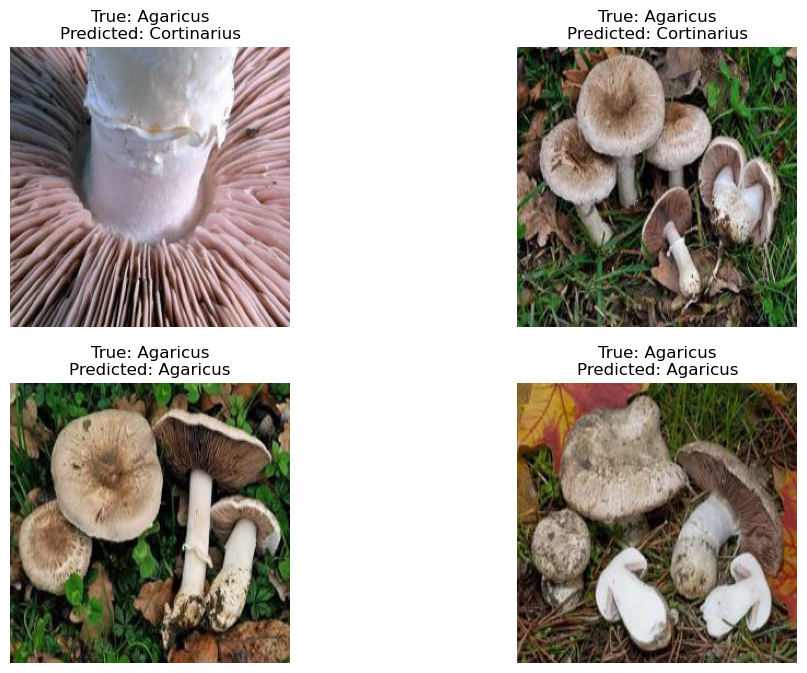

In [44]:
# Assuming you have trained and saved the model

# Get the class labels from the generator
class_labels = list(train_generator.class_indices.keys())

# Get a batch of images and labels from the test_generator
batch_images, batch_labels = next(test_generator)

# Make predictions on the batch of images
predictions = model_2.predict(batch_images)

# Get the index of the predicted class for each image
predicted_indices = np.argmax(predictions, axis=1)

# Display the images with their predicted labels
plt.figure(figsize=(12, 8))
for i in range(4):  # Display four random images
    plt.subplot(2, 2, i + 1)
    plt.imshow(batch_images[i])
    true_label = class_labels[np.argmax(batch_labels[i])]
    predicted_label = class_labels[predicted_indices[i]]
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.show()
